# The t-Distribution <hr style = "border:2.5px solid #0000FF"></hr>

<b> Byron Mojica </b>
<br>Comptech Student T09
<br> 01/27/2026

In [1]:
# Imports and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load dataset

df = pd.read_csv(r'DATASET\transformer-voltage-10-sample.csv',
                 index_col = 'Sample',
                 delimiter= ",")
df

,Voltage
Sample,
1,118.3
2,119.2
3,119.7
4,119.5
5,120.0
6,120.1
7,120.2
8,120.8
9,121.5


In [3]:
# summary of statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [4]:
# summary of statistics

df.describe()

,Voltage
count,10.000000
mean,120.110000
std,1.050344
min,118.300000
25%,119.550000
50%,120.050000
75%,120.650000
max,121.800000


In [5]:
# z-critical for two-tailed test

alpha = 0.05
n = df['Voltage'].count()

t_critical = stats.t.ppf(1-alpha/2,n-1)
t_critical

np.float64(2.2621571628540993)

In [6]:
# voltage distribution

mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)
n = df['Voltage'].count()

ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)

print(f"95% Confidence Level: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Level: (119.36, 120.86)


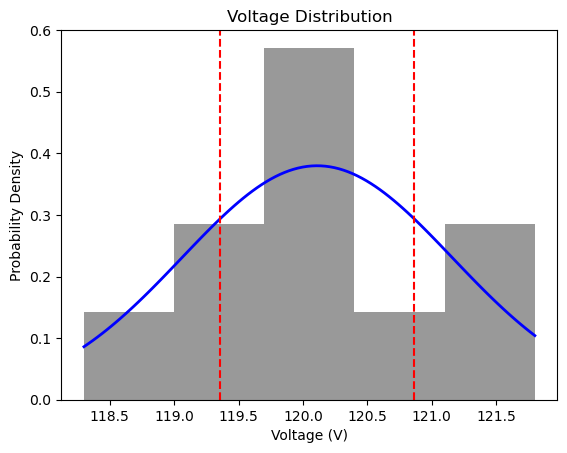

In [7]:
# voltage distribution

mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# normal distribution plot

x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot (x,p,
          linewidth = 2,
          color = 'blue')

# histogram

plt.hist (df['Voltage'],
          bins = 5,
          density = True,
          alpha = 0.8,
          color = 'gray')

plt.title ('Voltage Distribution')
plt.xlabel('Voltage (V)')
plt.ylabel('Probability Density')

plt.axvline (x = ci_lower,
             color = 'red',
             linestyle = '--',
             label = '95% CI Lower Bound')

plt.axvline (x = ci_upper,
             color = 'red',
             linestyle = '--',
             label = '95% CI Upper Bound')

plt.show()

# Shoe Inventory

In [8]:
# load dataset

df = pd.read_csv(r'DATASET\shoe-inventory.csv',
                 delimiter= ",")
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


In [9]:
# summary of statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Size    17 non-null     float64
 1   Jan     17 non-null     int64  
 2   Feb     17 non-null     int64  
 3   Mar     17 non-null     int64  
 4   Apr     17 non-null     int64  
 5   May     17 non-null     int64  
 6   Jun     17 non-null     int64  
 7   Jul     17 non-null     int64  
 8   Aug     17 non-null     int64  
 9   Sep     17 non-null     int64  
 10  Oct     17 non-null     int64  
 11  Nov     17 non-null     int64  
 12  Dec     17 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 KB


In [10]:
# summary of statistics

df.describe()

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,10.294118,6.470588,7.764706,7.882353,6.058824,9.411765,8.705882,9.705882,10.470588,8.352941,10.705882,7.352941,5.764706
std,2.989873,6.510738,8.792962,9.191588,7.249746,8.923696,10.872929,9.129380,12.879818,9.955785,12.493822,9.486445,7.369951
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,10.000000,4.000000,3.000000,3.000000,3.000000,6.000000,4.000000,6.000000,4.000000,4.000000,7.000000,3.000000,2.000000
75%,12.000000,12.000000,13.000000,13.000000,10.000000,15.000000,11.000000,17.000000,15.000000,9.000000,12.000000,13.000000,7.000000
max,16.000000,19.000000,26.000000,27.000000,24.000000,28.000000,33.000000,25.000000,47.000000,31.000000,44.000000,37.000000,26.000000


In [11]:
# (rows, columns)
df.shape

(17, 13)

In [12]:
# mean of size:6

mean_size_6 = df.iloc[0,1:13].mean()
mean_size_6

np.float64(2.9166666666666665)

In [13]:
# mean of size:6

std_size_6 = df.iloc[0,1:13].std()
std_size_6

1.781640374554423

In [14]:
# size 6 95% CI

n = df.shape[1]-1 # returns 13 in (17,12)

lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n - 1,
    loc = mean_size_6,
    scale = std_size_6/np.sqrt(n)
)

print (f"CI_6[{lower_6},{upper_6}]")

CI_6[1.7846663789548485,4.048666954378485]


In [15]:
# 95% Confidence Level

mean = df.iloc[0:17,1:13].mean(axis=1) # all 16 sizes
std = df.iloc[0:17,1:13].std(axis=1)

df ['ci_lower'], df ['ci_upper'] = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)

df

c:\Users\LOQ\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\LOQ\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,ci_lower,ci_upper
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1.784666,4.048667
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0.445009,2.888324
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0.330237,3.003096
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1.638094,4.695240
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4.139885,8.026782
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8.279920,13.220080
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14.499984,23.166683
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24.946583,35.720084
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19.300389,26.199611
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14.573064,20.593603


In [22]:
df['ci_lower'] = df['ci_lower'].fillna(0)
df['ci_upper'] = df['ci_upper'].fillna(0)

In [21]:
# convert to int and round to 0

df['ci_lower'] = df['ci_lower'].astype(int).round(2)
df['ci_upper'] = df['ci_upper'].astype(int).round(2)

In [20]:
# recommended no. of shoe pairs

df[['Size','ci_upper']]


,Size,ci_upper
0,6.0,4
1,6.5,2
2,7.0,3
3,7.5,4
4,8.0,8
5,8.5,13
6,9.0,23
7,9.5,35
8,10.0,26
9,10.5,20
